# 1 - Helper methods

In [1]:
def calculate_accuracy(answers: list[bool]) -> float:
    return sum(1 for a in answers if a) / len(answers)

In [2]:
def calculate_turns(data: dict) -> int:
    return len(data['messages'])

In [3]:
def calculate_average_assistant_text_length(data: dict) -> float:
    assistant_texts = [msg['content'] for msg in data['messages'] if msg['role'] == 'assistant']
    #if not assistant_texts:
    #    return 0.0
    return sum(len(text) for text in assistant_texts) / len(assistant_texts)

# 2 - Loading & Extracting

In [4]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
base_dir = 'data'

In [5]:
#per conversation
device_data = [] 
turns = []
text_lengths = []
#time = []
user_answers = []
all_files = []

for filename in os.listdir(base_dir):
    if filename.endswith('.pkl'):
        file_path = os.path.join(base_dir, filename)
        #if os.path.isfile(file_path):
        with open(file_path, 'rb') as f:
            file_data = pickle.load(f)

        all_files.append(file_data)
        
        # Calculate above statistics
        device_data.append(file_data["device"]) #stats on which device was used
        turns.append(calculate_turns(file_data))
        text_lengths.append(calculate_average_assistant_text_length(file_data))
        #time.append(calculate_time_difference(file_data))
        user_answers.append(file_data["correct_answer"])

## Device
Which laptop was used?

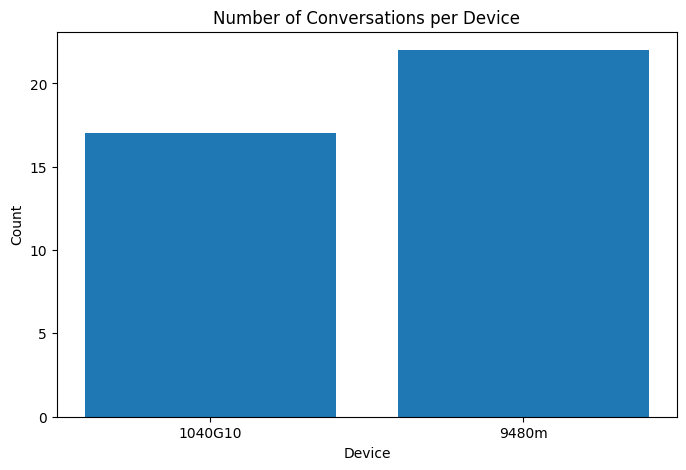

In [6]:
plt.figure(figsize=(8, 5))
plt.bar(*zip(*{d: device_data.count(d) for d in set(device_data)}.items()))
plt.xlabel('Device')
plt.ylabel('Count')
plt.title('Number of Conversations per Device')
plt.show()

# Number of Turns
Number of turns in a conversation

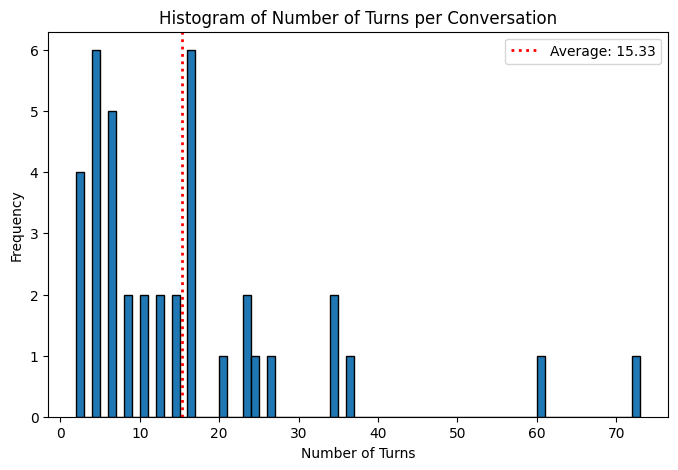

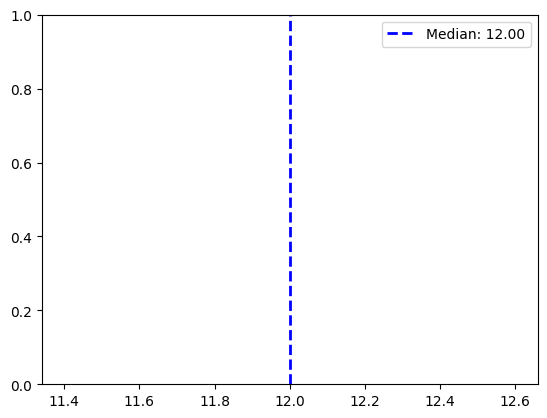

In [7]:
plt.figure(figsize=(8, 5))
plt.hist(turns, bins=range(min(turns), max(turns) + 2), edgecolor='black')
plt.xlabel('Number of Turns')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Turns per Conversation')

# Plot average as a red dotted line
avg_turns = sum(turns) / len(turns)
plt.axvline(avg_turns, color='red', linestyle='dotted', linewidth=2, label=f'Average: {avg_turns:.2f}')
plt.legend()
plt.show()
#median
median_turns = np.median(turns)
plt.axvline(median_turns, color='blue', linestyle='dashed', linewidth=2, label=f'Median: {median_turns:.2f}')
plt.legend()

In [8]:
# Find the indices of the two conversations with the most turns
top2_indices = np.argsort(turns)[-2:][::-1]  # indices of top 2, descending order

# Print the corresponding data for these conversations
for idx in top2_indices:
    print(f"Conversation {idx}:")
    #print(f"File: {file_names[idx]}")
    print(f"Number of turns: {turns[idx]}")
    #print(f"Device: {device_data[idx]}")
    print(f"Correct answer: {user_answers[idx]}")
    print()

Conversation 35:
Number of turns: 72
Correct answer: True

Conversation 36:
Number of turns: 60
Correct answer: True



# Output text length
Average assistant text length per conversation

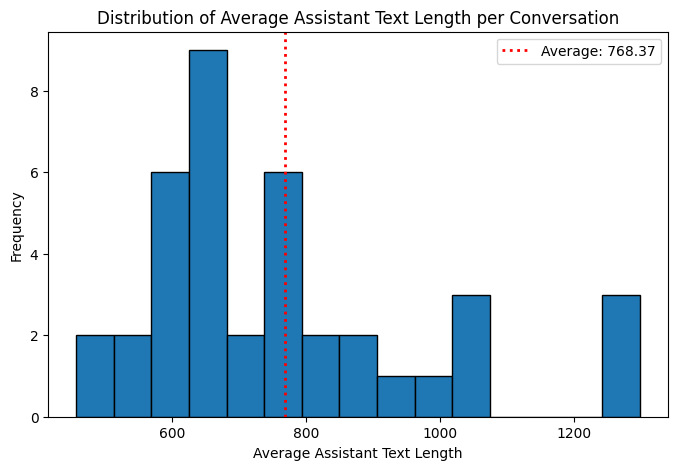

In [9]:
plt.figure(figsize=(8, 5))
plt.hist(text_lengths, bins=15, edgecolor='black')
plt.xlabel('Average Assistant Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Average Assistant Text Length per Conversation')

avg_text_length = sum(text_lengths) / len(text_lengths)
plt.axvline(avg_text_length, color='red', linestyle='dotted', linewidth=2, label=f'Average: {avg_text_length:.2f}')
plt.legend()
plt.show()

What happened with the very long one?

In [10]:
# Find the indices of the two conversations with the most turns
top3_indices = np.argsort(text_lengths)[-3:][::-1]  # indices of top 3, descending order

# Print the corresponding data for these conversations
for idx in top3_indices:
    print(f"Conversation {idx}:")
    #print(f"File: {all_files[idx]}")
    print(f"Number of turns: {turns[idx]}")
    #print(f"Device: {device_data[idx]}")
    print(f"Correct answer: {user_answers[idx]}")
    print()

Conversation 14:
Number of turns: 2
Correct answer: False

Conversation 25:
Number of turns: 16
Correct answer: True

Conversation 32:
Number of turns: 2
Correct answer: False



In [11]:
# Manual inspection
all_files[14]

{'correct_answer': False,
 'timestamp_begin': datetime.datetime(2025, 6, 12, 9, 52, 33, 110949),
 'timestamp_saved': datetime.datetime(2025, 6, 12, 9, 52, 33, 115495),
 'selected_question': 'Q8',
 'messages': [{'role': 'user',
   'content': 'if a set is orthogonal  are all vectors orthogonal to each other'},
  {'role': 'assistant',
   'content': "Okay, I understand you're working on a True/False question about orthogonal sets in $\\mathbb{R}^n$ and linear independence. The question is: *Every* orthogonal set in $\\mathbb{R}^n$ is linearly independent. The provided explanation and counterexample are helpful.\n\nBefore we definitively say True or False, let's break down the concepts and the given information.\n\nThe explanation brings up a crucial point about the zero vector. It states that the standard theorem about orthogonal sets and linear independence has a condition: the orthogonal set must consist of *nonzero* vectors.\n\nThe counterexample given is the set {0, $e_1$}, where 0 is 

What happened with the very short one?

In [12]:
# Find the indices of the two conversations with the most turns
min3_indices = np.argsort(text_lengths)[:3]

# Print the corresponding data for these conversations
for idx in min3_indices:
    print(f"Conversation {idx}:")
    #print(f"File: {all_files[idx]}")
    print(f"Number of turns: {turns[idx]}")
    #print(f"Device: {device_data[idx]}")
    print(f"Correct answer: {user_answers[idx]}")
    print()

Conversation 30:
Number of turns: 16
Correct answer: False

Conversation 31:
Number of turns: 16
Correct answer: False

Conversation 23:
Number of turns: 6
Correct answer: True



In [13]:
# Manual inspection
all_files[30]

{'correct_answer': False,
 'timestamp_begin': datetime.datetime(2025, 6, 12, 16, 24, 6, 169445),
 'timestamp_saved': datetime.datetime(2025, 6, 12, 16, 24, 6, 178596),
 'selected_question': 'Q4',
 'messages': [{'role': 'user', 'content': 'What is a symmetric marix?'},
  {'role': 'assistant',
   'content': "Okay, I see you're asking about symmetric matrices and have provided some context related to whether the product of two symmetric matrices is always symmetric. To make sure I'm helping you best, could you clarify what you'd like to know? Are you trying to understand:\n\n1.  The definition of a symmetric matrix?\n2.  Why the product of two symmetric matrices isn't always symmetric (as suggested by the context)?\n3.  Something else related to symmetric matrices?\n\nKnowing your specific goal will help me provide a clearer and more helpful explanation.\n "},
  {'role': 'user', 'content': '1.'},
  {'role': 'assistant',
   'content': 'Okay, so it sounds like you want to understand the def

## Accuracy
Percentage of correct answers that were in **downloaded** conversations

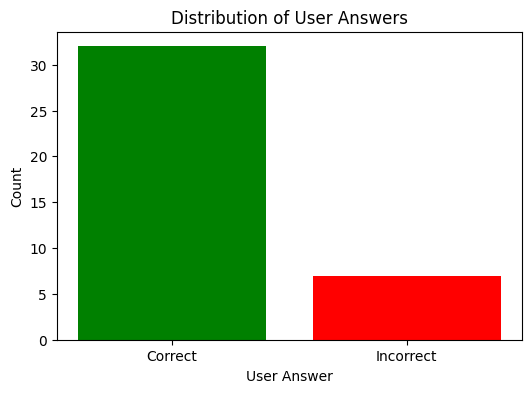

Accuracy: 32/39 = 82.05%


In [14]:
answer_counts = {True: user_answers.count(True), False: user_answers.count(False)}

plt.figure(figsize=(6, 4))
plt.bar(['Correct', 'Incorrect'], [answer_counts[True], answer_counts[False]], color=['green', 'red'])
plt.xlabel('User Answer')
plt.ylabel('Count')
plt.title('Distribution of User Answers')
plt.show()

accuracy = calculate_accuracy(user_answers)
print(f"Accuracy: {answer_counts[True]}/{answer_counts[True]+answer_counts[False]} = {accuracy:.2%}")

## Accuracy
Percentage of correct answers that were in **survey** responses

In [15]:
# Accuracy from questionaire per question

per_question = [12/(12+4), 12/(12+3), 6/(6+1), 5/(5+3), 5/(5+2), 10/(10+2), 8/(8+2), 3/(3+2)]
correct = 12+12+6+5+5+10+8+3
total = 12+4+12+3+6+1+5+3+5+2+10+2+8+2+3+2
print(f"Accuracy: {correct}/{total} = {correct/total:.2%}")

Accuracy: 61/80 = 76.25%


## Relationship between \#Turns \& Text length from assistant

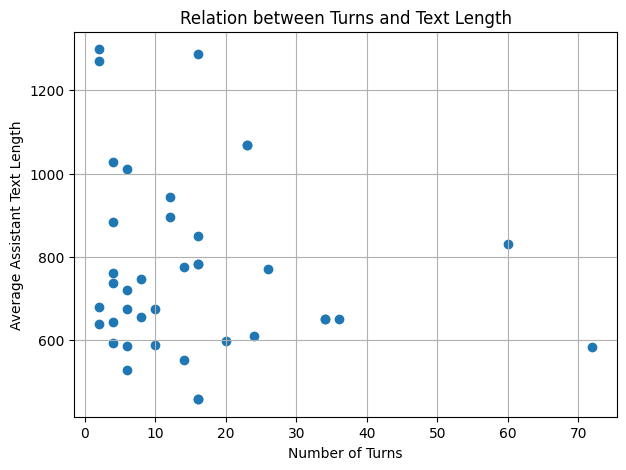

In [16]:
#from scipy.stats import pearsonr

#corr, p_value = pearsonr(text_lengths, turns)
#print(f"Pearson correlation coefficient: {corr:.2f}")
#print(f"P-value: {p_value:.4f}")

plt.figure(figsize=(7, 5))
plt.scatter(turns, text_lengths)
plt.xlabel('Number of Turns')
plt.ylabel('Average Assistant Text Length')
plt.title('Relation between Turns and Text Length')
plt.grid(True)
plt.show()